Employment columns: ['FREQ', 'FREQ_LABEL', 'REF_AREA', 'REF_AREA_LABEL', 'INDICATOR', 'INDICATOR_LABEL', 'UNIT_MEASURE', 'UNIT_MEASURE_LABEL', 'AGG_METHOD', 'AGG_METHOD_LABEL', 'DECIMALS', 'DECIMALS_LABEL', 'DATABASE_ID', 'DATABASE_ID_LABEL', 'UNIT_MULT', 'UNIT_MULT_LABEL', 'DATA_SOURCE', 'DATA_SOURCE_LABEL', 'OBS_STATUS', 'OBS_STATUS_LABEL', 'OBS_CONF', 'OBS_CONF_LABEL', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
Poverty columns: ['STRUCTURE', 'STRUCTURE_ID', 'ACTION', 'FREQ', 'FREQ_LABEL', 'REF_AREA', 'REF_AREA_LABEL', 'IND

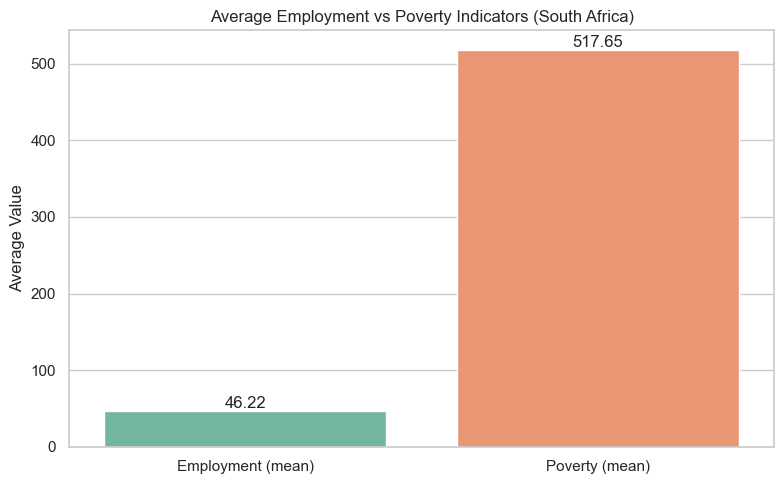

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Saved scatter plot to: C:\Users\Admin\Desktop\GroupX_DataAnalysis\NDTA631-DataAnalysis-GroupX\outputs\visualizations\scatter_plot.png


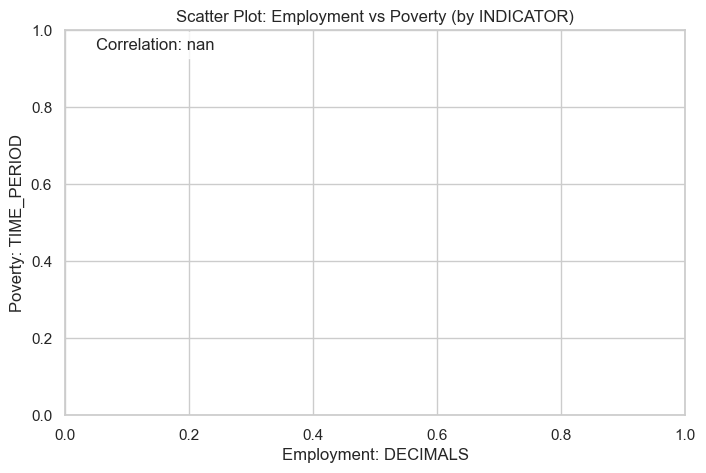

Saved box plot to: C:\Users\Admin\Desktop\GroupX_DataAnalysis\NDTA631-DataAnalysis-GroupX\outputs\visualizations\box_plot.png


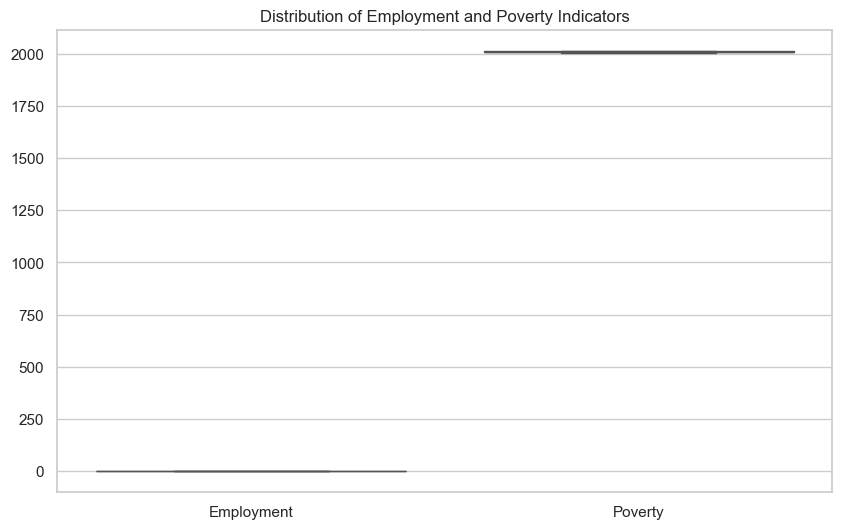

Saved histogram to: C:\Users\Admin\Desktop\GroupX_DataAnalysis\NDTA631-DataAnalysis-GroupX\outputs\visualizations\histogram.png


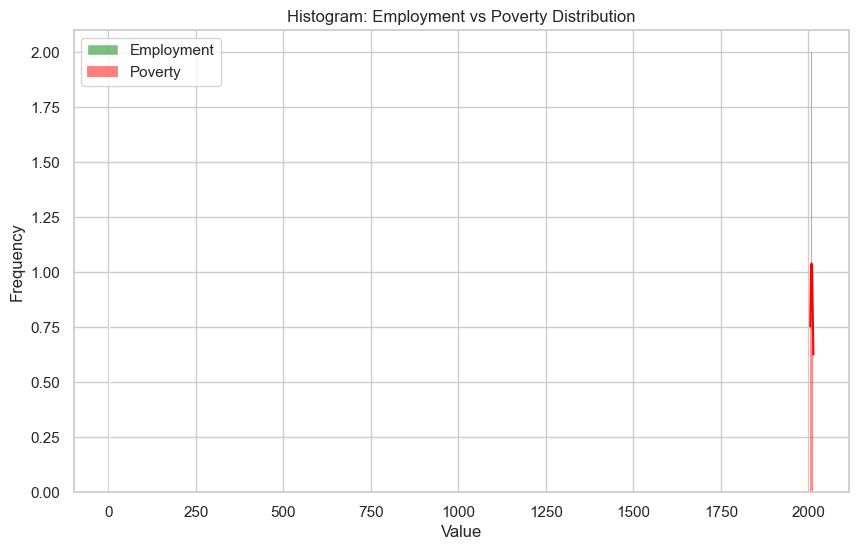

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

save_folder = r"C:\Users\Admin\Desktop\GroupX_DataAnalysis\NDTA631-DataAnalysis-GroupX\outputs\visualizations"

employment = pd.read_csv(
    r"C:\Users\Admin\Desktop\GroupX_DataAnalysis\NDTA631-DataAnalysis-GroupX\data\processed\employment_sa_clean.csv"
)
poverty = pd.read_csv(
    r"C:\Users\Admin\Desktop\GroupX_DataAnalysis\NDTA631-DataAnalysis-GroupX\data\processed\poverty_sa_clean.csv"
)

# Set style if the grids
sns.set(style="whitegrid", palette="muted")

print("Employment columns:", employment.columns.tolist())
print("Poverty columns:", poverty.columns.tolist())

if 'REF_AREA_LABEL' in employment.columns and 'REF_AREA_LABEL' in poverty.columns:
    merged_data = pd.merge(employment, poverty, on='REF_AREA_LABEL', how='inner')
    print("Merged data shape:", merged_data.shape)
else:
    print("No common identifier found for proper merging")



# 1. Bar Plot – Average comparison
plt.figure(figsize=(8,5))

employment_col = employment.select_dtypes(include='number').columns[0]
poverty_col = poverty.select_dtypes(include='number').columns[0]  
avg_values = {
    "Employment (mean)": employment.select_dtypes(include='number').mean().mean(),
    "Poverty (mean)": poverty.select_dtypes(include='number').mean().mean()
}

# Turn dictionary into DataFrame for seaborn
avg_df = pd.DataFrame({
    "Category": list(avg_values.keys()),
    "Value": list(avg_values.values())
})

ax = sns.barplot(data=avg_df, x="Category", y="Value", hue="Category", 
                palette="Set2", legend=False)
plt.title("Average Employment vs Poverty Indicators (South Africa)")
plt.ylabel("Average Value")
plt.xlabel("")

# Add value labels on bars
for i, v in enumerate(avg_df['Value']):
    ax.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig(os.path.join(save_folder, "bar_plot_average_comparison.png"), dpi=300, bbox_inches='tight')
print(f"Saved average comparison plot to: {os.path.join(save_folder, 'bar_plot_average_comparison.png')}")
plt.show()


# 2. Scatter Plot – Relationship
if 'INDICATOR' in employment.columns and 'INDICATOR' in poverty.columns:
    plt.figure(figsize=(8,5))
    # Use the first numeric column from each, aligned by year
    employment_data = employment.groupby('INDICATOR')[employment_col].mean()
    poverty_data = poverty.groupby('INDICATOR')[poverty_col].mean()
    
    sns.scatterplot(x=employment_data, y=poverty_data, color="blue", alpha=0.6)
    
    # Add correlation coefficient
    correlation = np.corrcoef(employment_data, poverty_data)[0, 1]
    plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', 
             transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.8))
    
    plt.xlabel(f"Employment: {employment_col}")
    plt.ylabel(f"Poverty: {poverty_col}")
    plt.title("Scatter Plot: Employment vs Poverty (by INDICATOR)")
    plt.savefig(os.path.join(save_folder, "scatter_plot.png"), dpi=300, bbox_inches='tight')
    print(f"Saved scatter plot to: {os.path.join(save_folder, 'scatter_plot.png')}")
    plt.show()
else:
    print("Cannot create meaningful scatter plot without common identifier")



# 3. Box Plot – Distribution of indicators
plt.figure(figsize=(10,6))
sns.boxplot(data=[employment.select_dtypes(include='number').iloc[:,0],
                  poverty.select_dtypes(include='number').iloc[:,0]])
plt.xticks([0,1], ["Employment", "Poverty"])
plt.title("Distribution of Employment and Poverty Indicators")
plt.savefig(os.path.join(save_folder, "box_plot.png"), dpi=300, bbox_inches='tight')
print(f"Saved box plot to: {os.path.join(save_folder, 'box_plot.png')}")
plt.show()


# 4. Histogram – Frequency distribution
plt.figure(figsize=(10,6))
sns.histplot(employment.select_dtypes(include='number').iloc[:,0], color="green", label="Employment", kde=True, alpha=0.5)
sns.histplot(poverty.select_dtypes(include='number').iloc[:,0], color="red", label="Poverty", kde=True, alpha=0.5)
plt.legend()
plt.title("Histogram: Employment vs Poverty Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.savefig(os.path.join(save_folder, "histogram.png"), dpi=300, bbox_inches='tight')
print(f"Saved histogram to: {os.path.join(save_folder, 'histogram.png')}")
plt.show()
